## 0.Introduction

## 1.Data collection and cleaning





In [3]:
from google.colab import files
uploaded = files.upload()

Saving webscraping_results_assignmnet3.csv to webscraping_results_assignmnet3.csv


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("webscraping_results_assignmnet3.csv")

In [ ]:
df.shape

(1250, 9)

In [6]:
result_df = df.drop_duplicates()

In [ ]:
result_df.shape

(1235, 9)

In [7]:
result_df.pop("Description")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1245   NaN
1246   NaN
1247   NaN
1248   NaN
1249   NaN
Name: Description, Length: 1235, dtype: float64

In [ ]:
result_df.head()

,Title,Company,Location,Rating,Date,Salary,Links,Descriptions
0,Senior Data Scientist (Predictive Analytics),Guardian Life Insurance Company,"Hybrid remote in New York, NY",3.6,PostedPosted 29 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Circle is a global financial technology firm t...
1,"Data Scientist & Risk Analytics, Assoc. Dir.",FHLBank San Francisco,"San Francisco, CA 94104 (Financial District/So...",3.1,PostedPosted 20 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Staff Pad has partnered with a Florida-bas...
2,Data Scientist,CAPITAL Services,"Sioux Falls, SD 57110",3.6,PostedPosted 30+ days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Req ID: 214557\n\nNTT DATA Services strives to...
3,Junior Health Analytics Data Scientist,UCLA Health,"Los Angeles, CA 90095",4.0,PostedPosted 8 days ago,"$73,900 - $170,700 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Company Overview\nWherever you work and whatev...
4,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",https://www.indeed.com/company/centrifuge-llc/...,Req ID: 214557\n\nNTT DATA Services strives to...


## 2. Exploratory data analysis and feature engineering

In [8]:
df1 = result_df.copy() 

In [9]:
#result_df[result_df['python'], result_df['sql']] = np.nan

df1[["Python", "SQL/databases", "Excel", "R", "Communication", 'Teamwork',"Presentation", "Problem Solving", "Project Management",\
     "Consulting", "Finance/Risk Management", "Statistics","Leadership", "Java", "C/C++", "MATLAB", "SAS", "SPSS", "Tableau","Stata",\
     "Power BI", "Hadoop", "Spark", "Mathematics", "Machine Learning","natural language processing/NLP","Analytics",\
     "Computer science", "Big Data", "Data Mining", "Data Visualization", "AWS", "Artificial Intelligence","Deep Learning",'decision making',\
    'GCP','Azure','Google Cloud','Algebra','Operations research','DevOps','Git']] = 0

In [8]:
df1.head()

,Title,Company,Location,Rating,Date,Salary,Links,Descriptions,Python,SQL/databases,...,Artificial Intelligence,Deep Learning,decision making,GCP,Azure,Google Cloud,Algebra,Operations research,DevOps,Git
0,Senior Data Scientist (Predictive Analytics),Guardian Life Insurance Company,"Hybrid remote in New York, NY",3.6,PostedPosted 29 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Circle is a global financial technology firm t...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Data Scientist & Risk Analytics, Assoc. Dir.",FHLBank San Francisco,"San Francisco, CA 94104 (Financial District/So...",3.1,PostedPosted 20 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Staff Pad has partnered with a Florida-bas...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,CAPITAL Services,"Sioux Falls, SD 57110",3.6,PostedPosted 30+ days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Req ID: 214557\n\nNTT DATA Services strives to...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Junior Health Analytics Data Scientist,UCLA Health,"Los Angeles, CA 90095",4.0,PostedPosted 8 days ago,"$73,900 - $170,700 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Company Overview\nWherever you work and whatev...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",https://www.indeed.com/company/centrifuge-llc/...,Req ID: 214557\n\nNTT DATA Services strives to...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
keyword_dic = {'Communication': ["Communication","communication","communicate","communicating"],
            'Problem Solving': ["Problem Solving", "problem solving", "problem-solving"],
            'Presentation': ['presentation', 'Presentation'],
            'Leadership': ['Leadership', 'leadership'],
            'Mathematics': ['Mathematics', 'Mathematical', 'mathematics', 'mathematical'],
            'Statistics': ['Statistics', 'statistics', 'Statistical', 'statistical', 'probability', 'Probability'],
            "natural language processing/NLP": ['natural language processing', 'NLP','nlp', 'Natural Language Processing'],
            "Analytics": ['Analytics', 'Analytics', 'analysis', 'Analysis'],
            "Computer science": ["Computer Science","computer science", "Computer science"],
            'Teamwork': ['Team leadership', 'team building', 'Teamwork', 'teamwork','collaboration'],
            'Consulting': ['Consulting', 'consulting', 'consultant'],
            'Big Data': ['Big Data', 'big data', 'cloud', 'Cloud'],
            'Data Mining': ['Data Mining', 'data mining', "DM"],
            'Data Visualization': ['Data Visualization', 'data visualization', 'Visualization', 'visualization','visualizing'],
            'Artificial Intelligence': ['Artificial Intelligence','artificial intelligence', 'AI'],
            "Project Management": ['Project Management', "project management", "Project management"],
            "Finance/Risk Management": ['Finance', 'finance', 'Risk Management', 'risk management', 'Risk management'],
            "Machine Learning": ['Machine Learning', 'machine learning', "ML"],
            'Deep Learning': ["deep learning", "Deep Learning", "DL", 'Neural Networks', 'ANN', 'MLP', 'CNN'],
            'Python': ["Python", "python"],
            'Java': ["Java", "java"],
            'SQL/databases': ["sql", "SQL", "Sql","databases"],
            'R': ['R ', ' R ', 'R,', 'R/'],
            'C/C++': ['C/C++', 'C++', ' C ', ' C/', 'C++/'],
            'Stata': ['Stata', 'stata'],
            'Excel': ['Excel '],
            'MATLAB': ['MATLAB','Matlab','matlab'],
            'SAS': ['SAS'],
            'SPSS': ["SPSS",'spss'],
            'Power BI': ['Power BI'],
            'Tableau': ['Tableau', 'tableau'],
            'AWS': ['AWS'],
            "Hadoop": ['Hadoop', 'hadoop'],
            'Spark': ['Spark','spark'],
            'decision making' : ['decision making', 'decision analysis'],
            'GCP': ['GCP'],
        'Azure': ['Azure'],
        'Google Cloud': ['Google Cloud'],
        'Algebra': ['Algebra'],
        'Operations research': ['Operations research'],
        'DevOps': ['DevOps', 'TDD', 'test-driven'],
        'Git':['GitHub', 'Git', 'version control']}

In [11]:
for ind in df1.index: #iterate each row
  for skill_category, skills_variation in keyword_dic.items():
    for skill in skills_variation:
      #if skill in df1["Descriptions"][ind]:
      if df1["Descriptions"][ind].find(skill) != -1:
        df1.loc[ind, skill_category] = 1

In [ ]:
df1.head(5)

,Title,Company,Location,Rating,Date,Salary,Links,Descriptions,Python,SQL/databases,...,Artificial Intelligence,Deep Learning,decision making,GCP,Azure,Google Cloud,Algebra,Operations research,DevOps,Git
0,Senior Data Scientist (Predictive Analytics),Guardian Life Insurance Company,"Hybrid remote in New York, NY",3.6,PostedPosted 29 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Circle is a global financial technology firm t...,1,1,...,0,0,1,0,0,0,0,0,0,0
1,"Data Scientist & Risk Analytics, Assoc. Dir.",FHLBank San Francisco,"San Francisco, CA 94104 (Financial District/So...",3.1,PostedPosted 20 days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,The Staff Pad has partnered with a Florida-bas...,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,CAPITAL Services,"Sioux Falls, SD 57110",3.6,PostedPosted 30+ days ago,NaN,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Req ID: 214557\n\nNTT DATA Services strives to...,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Junior Health Analytics Data Scientist,UCLA Health,"Los Angeles, CA 90095",4.0,PostedPosted 8 days ago,"$73,900 - $170,700 a year",https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Company Overview\nWherever you work and whatev...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Centrifuge LLC,Remote,NaN,Hiring ongoing,"$77,768 - $122,282 a year",https://www.indeed.com/company/centrifuge-llc/...,Req ID: 214557\n\nNTT DATA Services strives to...,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df1.loc['count'] = (df1).sum(axis=0)

<ipython-input-12-ad82abdf5ddb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.loc['count'] = (df1).sum(axis=0)


In [13]:
df_skills = df1[["Python", "SQL/databases", "Excel", "R", "Communication",'Teamwork', "Presentation", "Problem Solving", "Project Management",\
     "Consulting", "Finance/Risk Management", "Statistics","Leadership", "Java", "C/C++", "MATLAB", "SAS", "SPSS", "Tableau","Stata",\
     "Power BI", "Hadoop", "Spark", "Mathematics", "Machine Learning","natural language processing/NLP","Analytics",\
     "Computer science", "Big Data", "Data Mining", "Data Visualization", "AWS", "Artificial Intelligence","Deep Learning",\
     'GCP','Azure','Google Cloud','Algebra','Operations research','DevOps','Git']]

In [ ]:
df_skills

,Python,SQL/databases,Excel,R,Communication,Teamwork,Presentation,Problem Solving,Project Management,Consulting,...,AWS,Artificial Intelligence,Deep Learning,GCP,Azure,Google Cloud,Algebra,Operations research,DevOps,Git
0,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1249,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_skills.loc['count'] = (df_skills).sum(axis=0)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [15]:
df_skills1 = df_skills.loc['count']

In [16]:
df_skills_df = pd.DataFrame(df_skills1)

In [17]:
df_skills_df = df_skills_df.reset_index()

In [18]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

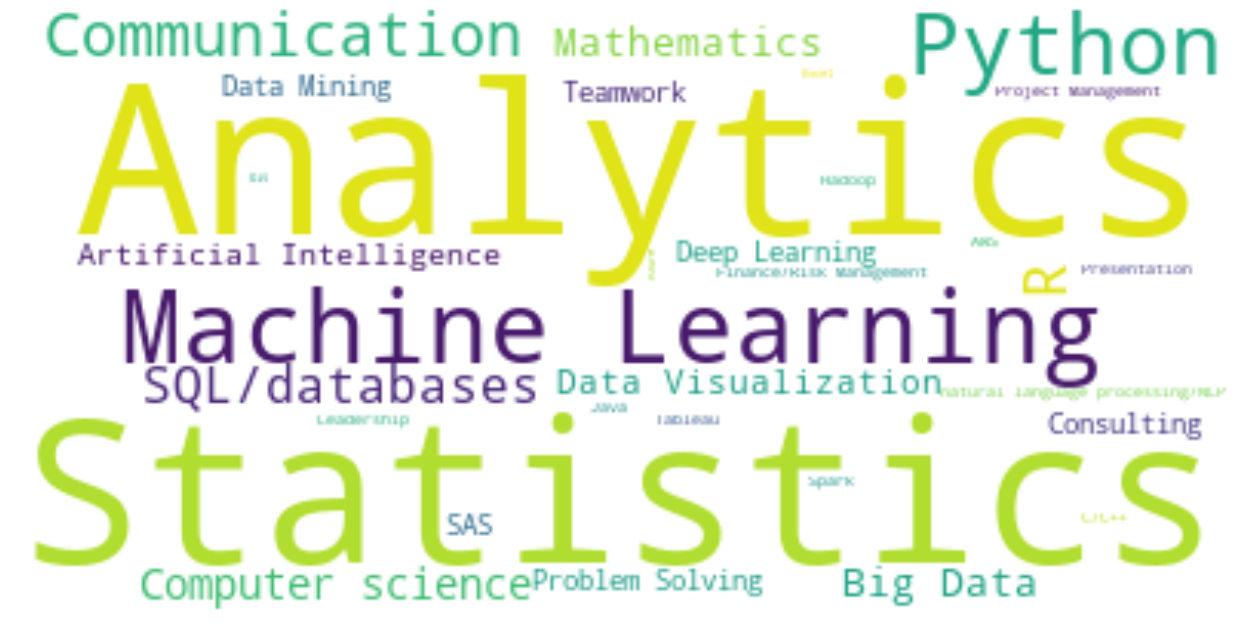

In [18]:
d = {}
for a, x in df_skills_df.values:  #where bag is a pandas DataFrame with columns words and counts
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
from pylab import rcParams
rcParams['figure.figsize'] = 22, 13
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
df_tech_skills = df1[["Python", "SQL/databases", "Excel", "R",\
    "Finance/Risk Management", "Statistics","Java", "C/C++", "MATLAB", "SAS", "SPSS", "Tableau","Stata",\
     "Power BI", "Hadoop", "Spark", "Mathematics", "Machine Learning","natural language processing/NLP","Analytics",\
     "Computer science", "Big Data", "Data Mining", "Data Visualization", "AWS", "Artificial Intelligence","Deep Learning",\
     'GCP','Azure','Google Cloud','Algebra','Operations research','DevOps','Git']]

In [20]:
df_tech_skills

,Python,SQL/databases,Excel,R,Finance/Risk Management,Statistics,Java,C/C++,MATLAB,SAS,...,AWS,Artificial Intelligence,Deep Learning,GCP,Azure,Google Cloud,Algebra,Operations research,DevOps,Git
0,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,1,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1249,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


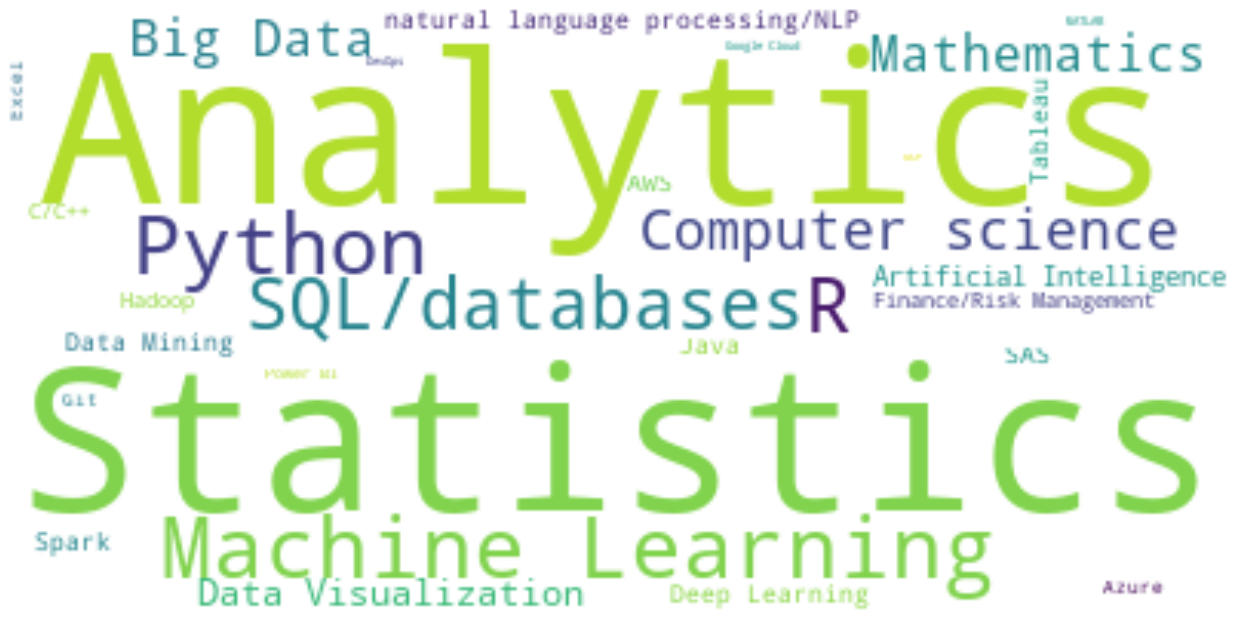

In [20]:
df_tech_skills.loc['count'] = (df_tech_skills).sum(axis=0)
df_tech_skills1 = df_tech_skills.loc['count']
df_tech_skills_df = pd.DataFrame(df_tech_skills1)
df_tech_skills_df = df_tech_skills_df.reset_index()
d = {}
for a, x in df_tech_skills_df.values:  #where bag is a pandas DataFrame with columns words and counts
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
from pylab import rcParams
rcParams['figure.figsize'] = 22, 13
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
df_soft_skills =df1[["Communication",'Teamwork', "Presentation", "Problem Solving", "Project Management",\
     "Consulting", "Leadership", 'decision making']]

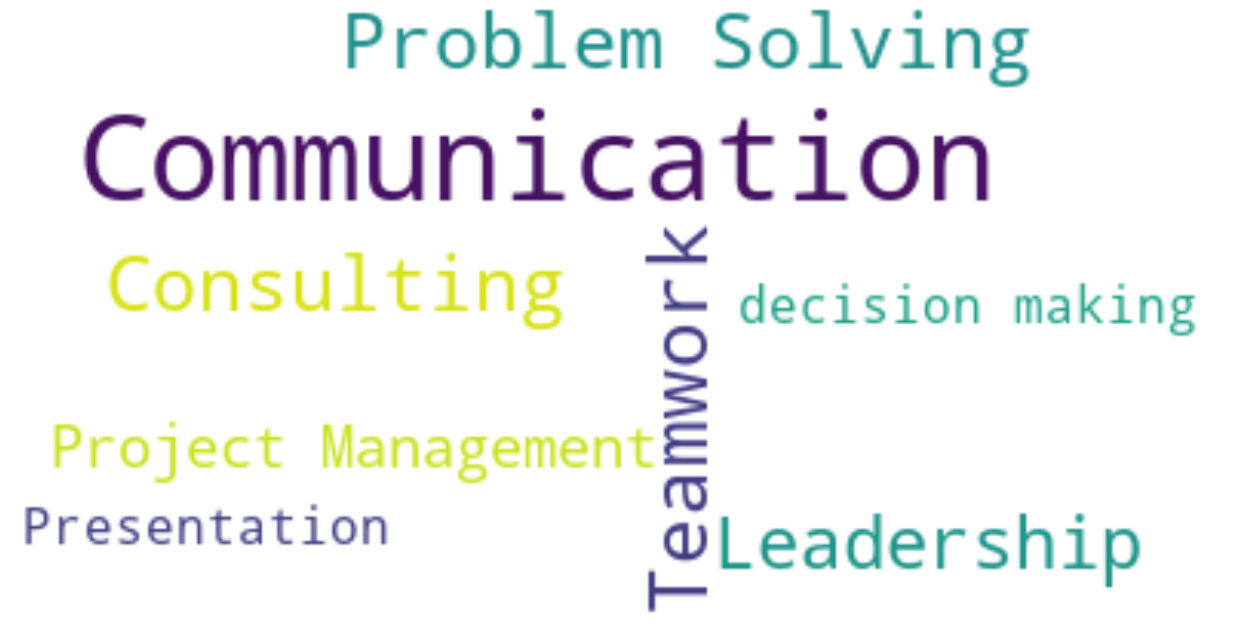

In [ ]:
df_soft_skills.loc['count'] = (df_soft_skills).sum(axis=0)
df_soft_skills1 = df_soft_skills.loc['count']
df_soft_skills_df = pd.DataFrame(df_soft_skills1)
df_soft_skills_df = df_soft_skills_df.reset_index()
d = {}
for a, x in df_soft_skills_df.values:  #where bag is a pandas DataFrame with columns words and counts
    d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)
from pylab import rcParams
rcParams['figure.figsize'] = 22, 13
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##  3.Hierarchical clustering implementation

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

Hierarchical clustering for all skills.

In [22]:
df_skills_cluster = df_skills.drop('count', axis= 0)

In [ ]:
df_skills_cluster

,Python,SQL/databases,Excel,R,Communication,Teamwork,Presentation,Problem Solving,Project Management,Consulting,...,AWS,Artificial Intelligence,Deep Learning,GCP,Azure,Google Cloud,Algebra,Operations research,DevOps,Git
0,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1,1,0,0,1,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
1246,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1248,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


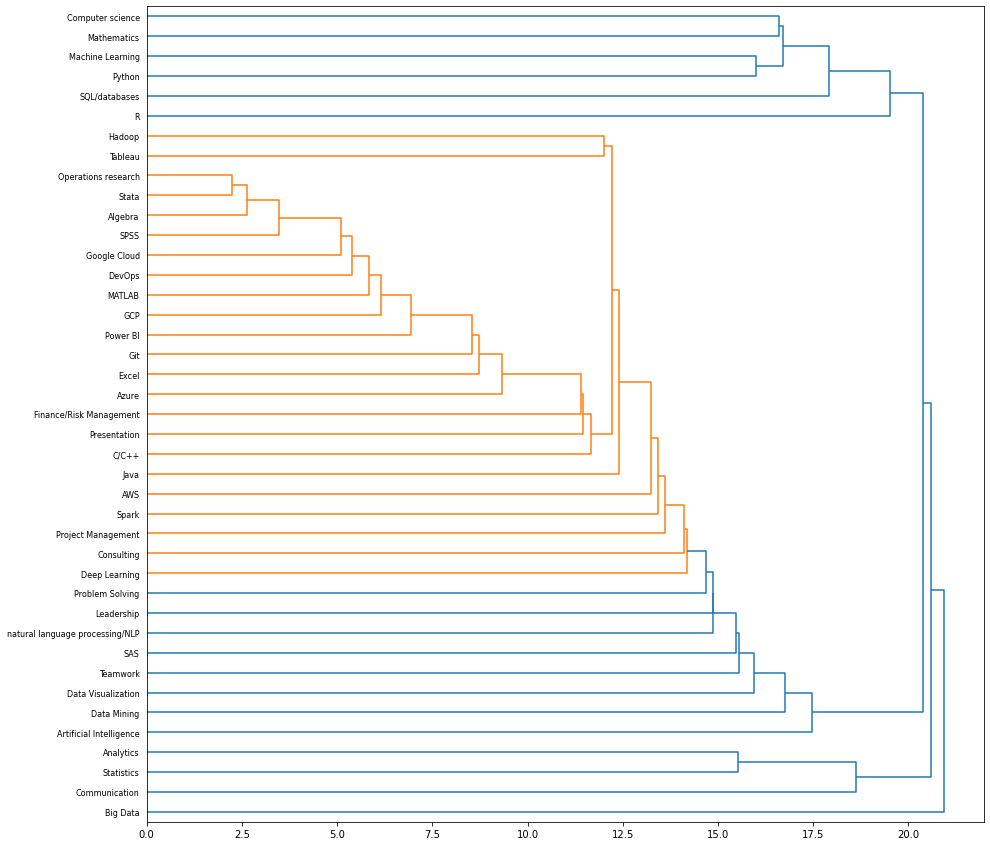

In [23]:
X_all_skills = df_skills_cluster.values
skill_all = df_skills_cluster.columns.values
fig, ax = plt.subplots(1,1, figsize=(15, 15))
z = linkage(X_all_skills.T)
dn = dendrogram(z, orientation='right')
labels = skill_all[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

Hierarchical clustering for tech skills.

In [25]:
df_tech_skills_cluster = df_tech_skills.drop('count', axis= 0)

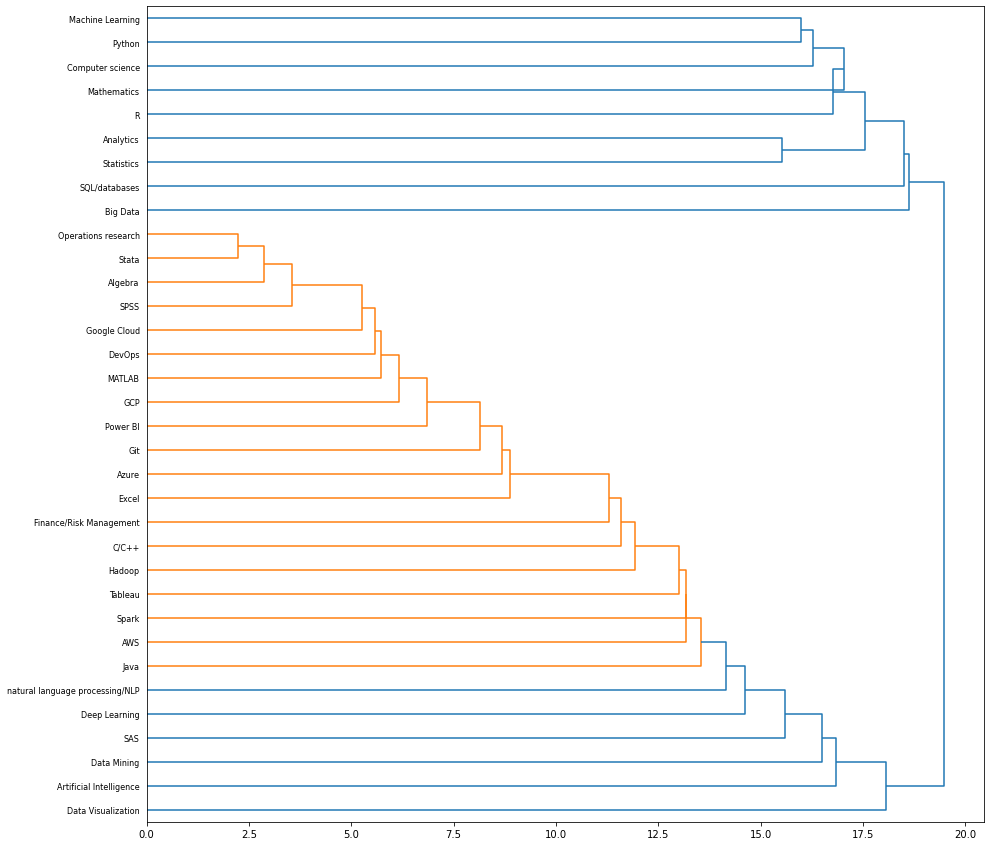

In [26]:
X_tech_skills = df_tech_skills_cluster.values
skill_all = df_tech_skills_cluster.columns.values
fig, ax = plt.subplots(1,1, figsize=(15, 15))
z = linkage(X_tech_skills.T,'centroid')
dn = dendrogram(z, orientation='right')
labels = skill_all[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

In [30]:
df_soft_skills_cluster = df_soft_skills.drop('count', axis= 0)

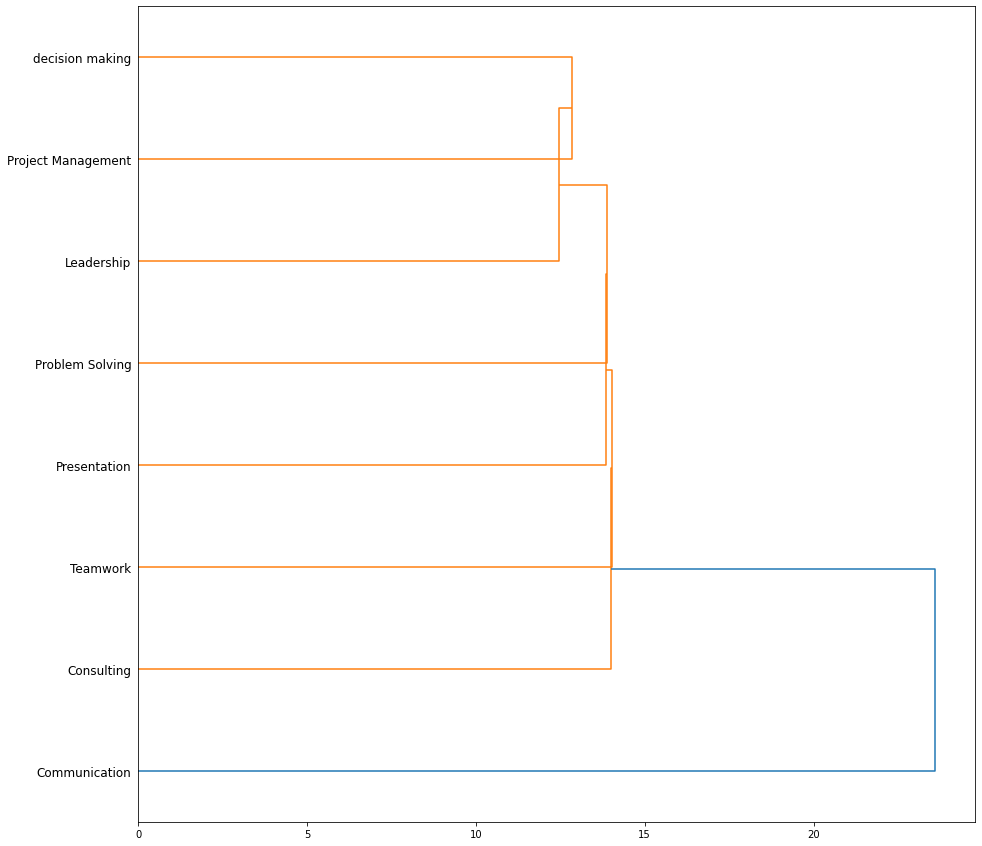

In [31]:
X_soft_skills = df_soft_skills_cluster.values
skill_all = df_soft_skills_cluster.columns.values
fig, ax = plt.subplots(1,1, figsize=(15, 15))
z = linkage(X_soft_skills.T,'centroid')
dn = dendrogram(z, orientation='right')
labels = skill_all[dn['leaves']]
ax.set_yticklabels(labels)
plt.show()

## 4. K-means clustering implementation

In [ ]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=0103103b74da935ade2a3e46be9f8c92ce63831f27458691a1c8b75257d9cf63
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 7.4 MB/s 
     |████████████████████████████████| 30.5 MB 48.1 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 6.3 MB 49.3 MB/s 


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils

In [38]:
df_tech_skills_cluster_transposed = df_tech_skills_cluster.T

df1 = df_tech_skills_cluster_transposed.copy()

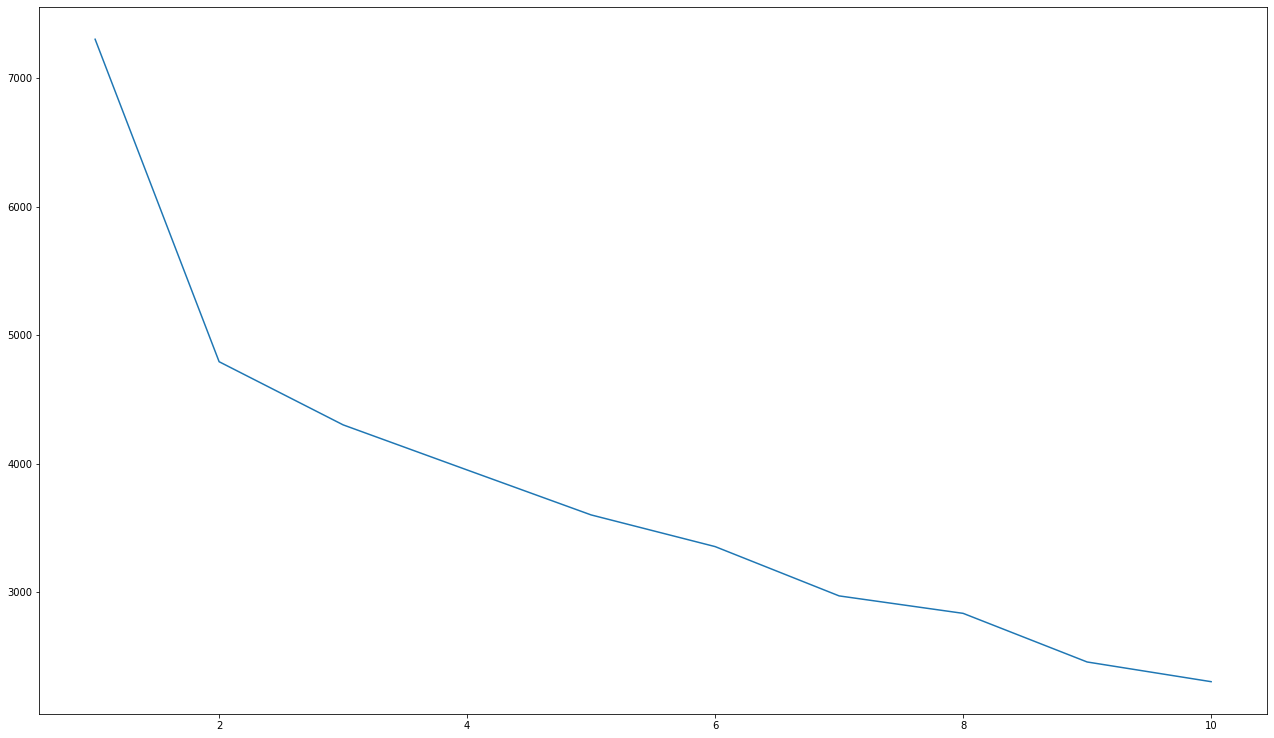

In [39]:
import seaborn as sns
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df1)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [40]:
# Create KMeans object
kmeans = KMeans(n_clusters=9)

# Train
kmeans.fit(df1)

# Get output
labels = kmeans.labels_
# Add labels to dataframe
df1['KMeans_LT_Clusters'] = labels

In [33]:
df_tech_skills_cluster_transposed['KMeans_LT_Clusters']

Python                             7
SQL/databases                      6
Excel                              4
R                                  0
Finance/Risk Management            2
Statistics                         3
Java                               1
C/C++                              4
MATLAB                             4
SAS                                2
SPSS                               4
Tableau                            8
Stata                              4
Power BI                           4
Hadoop                             8
Spark                              4
Mathematics                        5
Machine Learning                   7
natural language processing/NLP    2
Analytics                          3
Computer science                   5
Big Data                           5
Data Mining                        4
Data Visualization                 8
AWS                                2
Artificial Intelligence            2
Deep Learning                      1
G

In [43]:
from sklearn.decomposition import PCA

pca = PCA(2)

df_reduced = pca.fit_transform(df_tech_skills_cluster_transposed)

In [49]:
df_tech_skills_cluster_transposed.shape

(34, 1235)

In [48]:
df_reduced.shape

(34, 2)

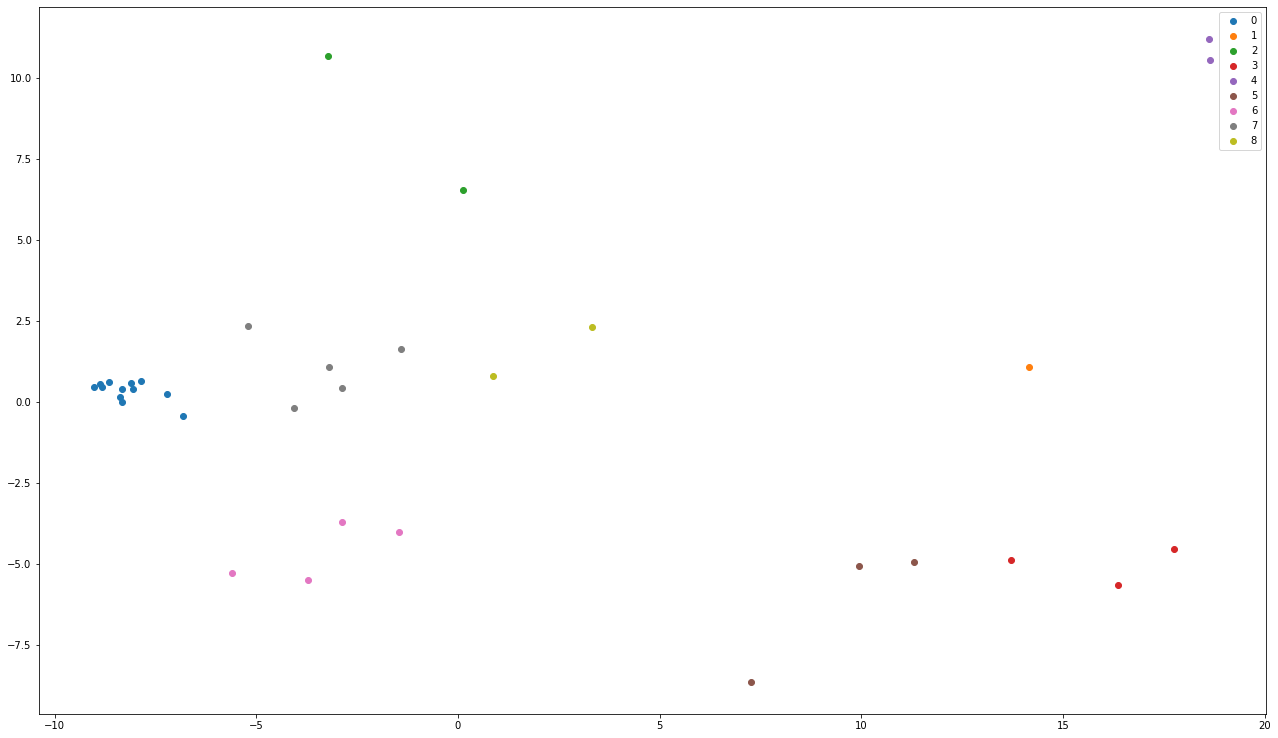

In [45]:
lebal_kmeans = kmeans.fit_predict(df_reduced)

label_uni = np.unique(lebal_kmeans)

for i in label_uni:
  plt.scatter(df_reduced[lebal_kmeans==i,0], df_reduced[lebal_kmeans==i,1], label = i)
plt.legend()
plt.show()


In [60]:
df2 = df2.reset_index()

In [87]:
group_list = []
for p in range(0,9):
  cat = df2[df2['KMeans_LT_Clusters'] == p]
  group_list.append(cat)

In [88]:

group_list_skill = []
 
for i in range(0,9):
  group_list_skill.append(group_list[i]['index'].values.tolist())

In [89]:
len(group_list_skill)

9

In [92]:
group_list_skill[8]

['Tableau', 'Hadoop', 'natural language processing/NLP', 'Data Visualization']

In [93]:
for i in range(0,9):
  print('group',i)
  print(group_list_skill[i])

group 0
['Statistics', 'Analytics']
group 1
['Java', 'C/C++', 'Spark', 'Deep Learning']
group 2
['Python', 'SQL/databases']
group 3
['Mathematics']
group 4
['Excel', 'Finance/Risk Management', 'MATLAB', 'SAS', 'SPSS', 'Stata', 'Power BI', 'Data Mining', 'AWS', 'Artificial Intelligence', 'GCP', 'Azure', 'Google Cloud', 'Algebra', 'Operations research', 'DevOps', 'Git']
group 5
['R']
group 6
['Big Data']
group 7
['Machine Learning', 'Computer science']
group 8
['Tableau', 'Hadoop', 'natural language processing/NLP', 'Data Visualization']


##  5.Interpretation of results, discussion and final course curriculum


The results are shown in PDF file.